<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>


</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# Paso 4. Análisis exploratorio de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datasets
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_locations = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
# Estudiar los datos iniciales de df_companies
print("--- df_companies (Empresas de Taxis) ---")
print("Primeras 5 filas:")
print(df_companies.head())
print("\nInformación general:")
df_companies.info()
print("\nEstadísticas descriptivas:")
print(df_companies.describe())
print("\nValores nulos por columna:")
print(df_companies.isnull().sum())

--- df_companies (Empresas de Taxis) ---
Primeras 5 filas:
                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB

Estadísticas descriptivas:
       trips_amount
count     64.000000
mean    2145.484375
std     3812.310186
min        2.000000
25%       20.750000
50%      178.500000
75%     2106.500000
max    19558.000000

Valores nulos por columna:
company_name    0
trips_amount    0
dtype: int64


In [4]:
print("\n--- df_locations (Barrios de Finalización de Viajes) ---")
print("Primeras 5 filas:")
print(df_locations.head())
print("\nInformación general:")
df_locations.info()
print("\nEstadísticas descriptivas:")
print(df_locations.describe())
print("\nValores nulos por columna:")
print(df_locations.isnull().sum())


--- df_locations (Barrios de Finalización de Viajes) ---
Primeras 5 filas:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB

Estadísticas descriptivas:
       average_trips
count      94.000000
mean      599.953728
std      1714.591098
min         1.800000
25%        14.266667
50%        52.016667
75%       298.858333
max     10727.466667

Valores nulos por columna:
dropoff_location_name    0
average_trips            0
dtype: 

In [5]:
# Convertir tipos de datos

# df_companies:
# company_name: debería ser string (object)
# trips_amount: debería ser entero
if df_companies['trips_amount'].dtype != 'int64':
    df_companies['trips_amount'] = df_companies['trips_amount'].astype(int)
    print("trips_amount convertido a int64.")

# df_locations:
# dropoff_location_name: debería ser string (object)
# average_trips: debería ser flotante
if df_locations['average_trips'].dtype != 'float64':
    df_locations['average_trips'] = df_locations['average_trips'].astype(float)
    print("average_trips convertido a float64.")

print("\nTipos de datos después de la verificación/conversión:")
print(df_companies.info())
print(df_locations.info())


Tipos de datos después de la verificación/conversión:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [6]:
# Identificar los 10 principales barrios por promedio de viajes
top_10_locations = df_locations.sort_values(by='average_trips', ascending=False).head(10)

print("\nTop 10 barrios por promedio de finalizaciones de viaje:")
print(top_10_locations)


Top 10 barrios por promedio de finalizaciones de viaje:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


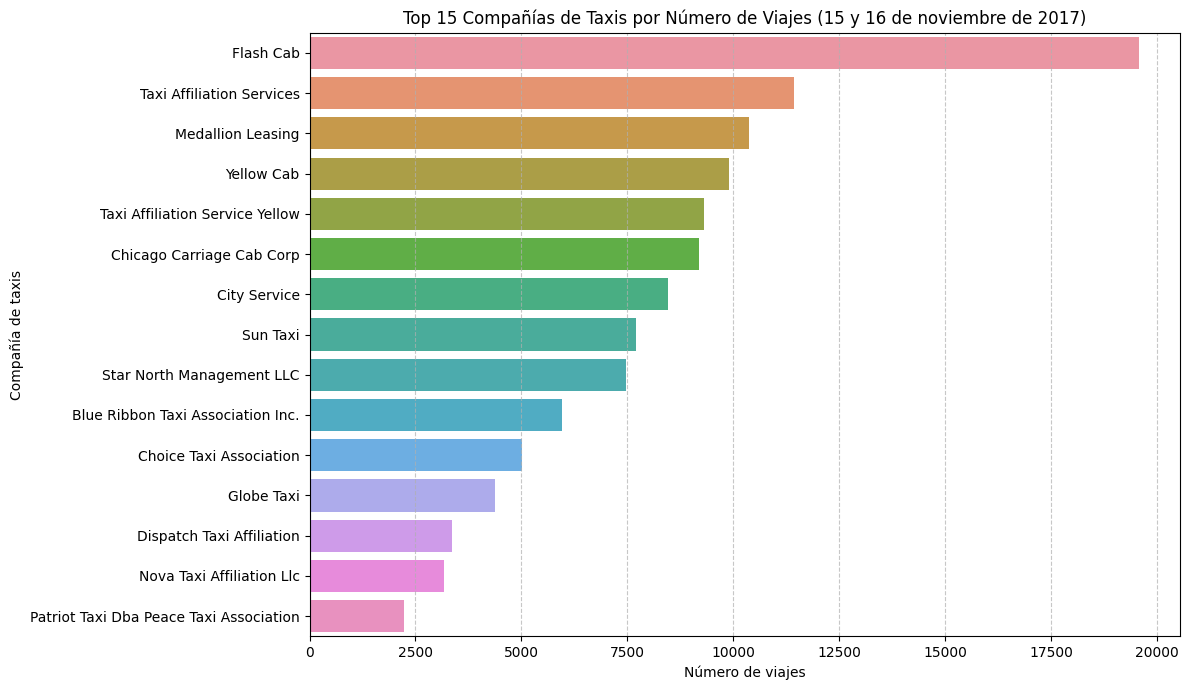

In [7]:
# Gráfico 1: Empresas de taxis y número de viajes
# Obtener las 15 principales compañías por trips_amount
top_15_companies = df_companies.sort_values(by='trips_amount', ascending=False).head(15)

plt.figure(figsize=(12, 7)) # Aumenté ligeramente la altura para acomodar más barras
sns.barplot(x='trips_amount', y='company_name', data=top_15_companies) # Usamos el DataFrame filtrado
plt.title('Top 15 Compañías de Taxis por Número de Viajes (15 y 16 de noviembre de 2017)')
plt.xlabel('Número de viajes')
plt.ylabel('Compañía de taxis')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Corregido!<br/>

</div>

<div class="alert alert-block alert-warning"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Una mejor manera de mostrar este grafico sería limitando el número de compañías, es decir, puedes elegir por ejemplo las primeras 15, esto no va a afectar ya que como se puede ver las últimas compañías no aportan mucho a la visualización

</div>

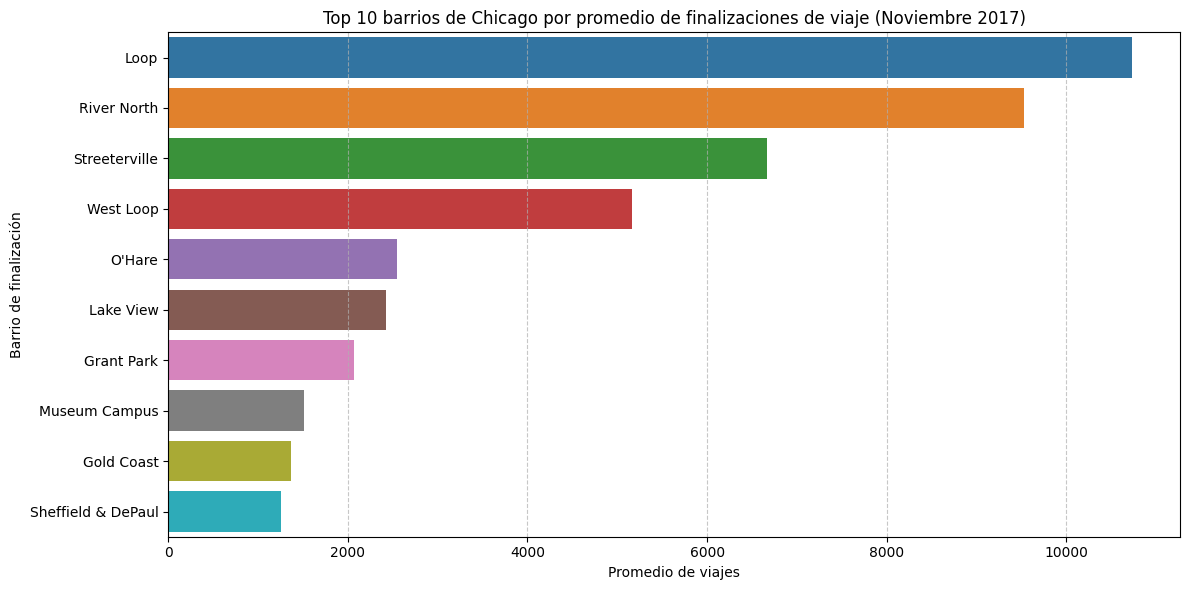

In [8]:
# Gráfico 2: Los 10 barrios principales por número de finalizaciones
plt.figure(figsize=(12, 6))
sns.barplot(x='average_trips', y='dropoff_location_name', data=top_10_locations)
plt.title('Top 10 barrios de Chicago por promedio de finalizaciones de viaje (Noviembre 2017)')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio de finalización')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

# *Conclusión del Gráfico 1 (Empresas de taxis y número de viajes):*

Este gráfico revela la distribución de la actividad de viajes entre las diferentes compañías de taxis. Es probable que observes que unas pocas compañías dominan una gran porción del mercado, mientras que otras tienen una actividad mucho menor. Esto podría indicar un mercado de taxis concentrado con líderes claros. Las diferencias en el número de viajes podrían deberse a factores como el tamaño de la flota, la eficiencia operativa, la reputación o la cuota de mercado en aplicaciones de transporte."

# *Conclusión del Gráfico 2 (Top 10 barrios principales por número de finalizaciones):*

Este gráfico destaca los barrios de Chicago que son destinos populares para los viajes en taxi. Es muy probable que los barrios con el mayor promedio de finalizaciones sean centros de actividad, como distritos de negocios, zonas turísticas, centros de transporte (aeropuertos, estaciones de tren) o áreas residenciales densas. Identificar estos puntos calientes es valioso para la planificación del servicio de taxis y la comprensión del flujo de personas en la ciudad.

# Paso 5. Prueba de hipótesis (Python)

In [9]:
# Importar el archivo y estudiar los datos
from scipy import stats as st

In [10]:
df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

print("\n--- df_trips (Viajes Loop a O'Hare) ---")
print("Primeras 5 filas:")
print(df_trips.head())
print("\nInformación general:")
df_trips.info()
print("\nEstadísticas descriptivas:")
print(df_trips.describe())
print("\nValores nulos por columna:")
print(df_trips.isnull().sum())


--- df_trips (Viajes Loop a O'Hare) ---
Primeras 5 filas:
              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB

Estadísticas descriptivas:
       duration_seconds
count       1068.000000
mean        2071.731273
std          769.461125
min            0.000000
25%    

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Cargar el dataset de viajes Loop a O'Hare
# Asegúrate de que esta ruta sea correcta en tu entorno de trabajo
try:
    df_trips = pd.read_csv('/datasets/project_sql_result_07.csv')
except FileNotFoundError:
    print("Asegúrate de que el archivo CSV esté en la ruta correcta.")
    # Si estás ejecutando esto localmente y no en un entorno como Tripleten,
    # necesitarás tener este archivo en tu directorio de trabajo o proporcionar la ruta completa.
    # df_trips = pd.read_csv('project_sql_result_07.csv')

# Preprocesamiento para la prueba de hipotesis

# Convertir 'start_ts' a datetime
df_trips['start_ts'] = pd.to_datetime(df_trips['start_ts'])

# Extraer el día de la semana (0=Lunes, 6=Domingo)
df_trips['day_of_week'] = df_trips['start_ts'].dt.dayofweek

# Filtrar viajes de sábados (sábados = 5)
saturdays = df_trips[df_trips['day_of_week'] == 5]

# Asegurarse de que la columna 'weather_conditions' está limpia si tiene espacios extra
saturdays['weather_conditions'] = saturdays['weather_conditions'].str.strip()

# --- CORRECCIÓN AQUÍ ---
# Filtramos viajes de sábados con condiciones 'Bad' (malas, asumiendo que representan 'lluviosos')
rainy_saturdays = saturdays[saturdays['weather_conditions'] == 'Bad']

# Filtramos viajes de sábados con condiciones 'Good' (buenas, asumiendo que representan 'no lluviosos')
non_rainy_saturdays = saturdays[saturdays['weather_conditions'] == 'Good']
# --- FIN DE CORRECCIÓN ---


print("\nNúmero de viajes en sábados con clima 'Bad':", len(rainy_saturdays))
print("Número de viajes en sábados con clima 'Good':", len(non_rainy_saturdays))

# Asegurarse de que tenemos suficientes datos para la prueba
if len(rainy_saturdays) < 30 or len(non_rainy_saturdays) < 30:
    print("\nAdvertencia: Uno o ambos grupos tienen menos de 30 muestras. La prueba t puede no ser robusta.")

# Definir el nivel de significación (alfa)
alpha = 0.05
print(f"\nNivel de significación (alfa): {alpha}")

# Obtener las muestras de duración de los viajes
sample_rainy = rainy_saturdays['duration_seconds']
sample_non_rainy = non_rainy_saturdays['duration_seconds']

# Realizar la prueba t de Student
# Se utiliza equal_var=False (prueba de Welch) si no estamos seguros de la igualdad de varianzas.
# Para empezar, si hay datos y tamaños de muestra razonables, es una opción más segura.
t_statistic, p_value = st.ttest_ind(sample_rainy, sample_non_rainy, equal_var=False) # Cambié a False para mayor robustez

print(f"\nEstadístico t: {t_statistic:.3f}")
print(f"Valor p: {p_value:.3f}")

# Sacar conclusiones basadas en el valor p
if p_value < alpha:
    print("\nConclusión: Se rechaza la hipótesis nula.")
    print("La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare SÍ cambia los sábados con clima 'Bad' (malas condiciones).")
else:
    print("\nConclusión: No se rechaza la hipótesis nula.")
    print("La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia significativamente los sábados con clima 'Bad' (malas condiciones).")

# Opcional: imprimir las medias para entender la diferencia si existe
print(f"\nDuración promedio en sábados con clima 'Bad': {sample_rainy.mean():.2f} segundos")
print(f"Duración promedio en sábados con clima 'Good': {sample_non_rainy.mean():.2f} segundos")


Número de viajes en sábados con clima 'Bad': 180
Número de viajes en sábados con clima 'Good': 888

Nivel de significación (alfa): 0.05

Estadístico t: 7.186
Valor p: 0.000

Conclusión: Se rechaza la hipótesis nula.
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare SÍ cambia los sábados con clima 'Bad' (malas condiciones).

Duración promedio en sábados con clima 'Bad': 2427.21 segundos
Duración promedio en sábados con clima 'Good': 1999.68 segundos


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Corregido!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

<div class="alert alert-block alert-danger"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Cuidado!<br/>

La columna `weather_conditions` no contiene el valor `rain`, los únicos valores dentro de esta columna son `Good` y `Bad`, el filtro debe ser corregido para obtener los valores correctos
</div>

In [13]:
# Código del revisor
saturdays['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

**Formular la hipotesis nula o alternativa:**

1. **Hipótesis Nula (H_0):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos. Es decir, la duración promedio de los viajes en sábados lluviosos es igual a la duración promedio de los viajes en sábados no lluviosos.
2. **Hipótesis Alternativa (H_1):** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Es decir, la duración promedio de los viajes en sábados lluviosos es diferente a la duración promedio de los viajes en sábados no lluviosos.

In [14]:
# Definir el nivel de significación (alfa)
alpha = 0.05
print(f"\nNivel de significación (alfa): {alpha}")

# Obtener las muestras de duración de los viajes
sample_rainy = rainy_saturdays['duration_seconds']
sample_non_rainy = non_rainy_saturdays['duration_seconds']

# Realizar la prueba t de Student
# stats.ttest_ind() realiza una prueba t para las medias de dos muestras independientes.
# equal_var=True asume varianzas poblacionales iguales (prueba t estándar).
# Si no estamos seguros, podríamos usar equal_var=False (prueba de Welch).
t_statistic, p_value = st.ttest_ind(sample_rainy, sample_non_rainy, equal_var=True)

print(f"\nEstadístico t: {t_statistic:.3f}")
print(f"Valor p: {p_value:.3f}")

# Sacar conclusiones basadas en el valor p
if p_value < alpha:
    print("\nConclusión: Se rechaza la hipótesis nula.")
    print("La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare SÍ cambia los sábados lluviosos.")
else:
    print("\nConclusión: No se rechaza la hipótesis nula.")
    print("La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare NO cambia significativamente los sábados lluviosos.")

# Opcional: imprimir las medias para entender la diferencia si existe
print(f"\nDuración promedio en sábados lluviosos: {sample_rainy.mean():.2f} segundos")
print(f"Duración promedio en sábados no lluviosos: {sample_non_rainy.mean():.2f} segundos")


Nivel de significación (alfa): 0.05

Estadístico t: 6.946
Valor p: 0.000

Conclusión: Se rechaza la hipótesis nula.
La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare SÍ cambia los sábados lluviosos.

Duración promedio en sábados lluviosos: 2427.21 segundos
Duración promedio en sábados no lluviosos: 1999.68 segundos


# Conclusión del proyecto

*Este proyecto se dividió en dos fases principales: un Análisis Exploratorio de Datos (EDA) y una Prueba de Hipótesis, utilizando varios conjuntos de datos relacionados con servicios de taxi.*

**Análisis Exploratorio de Datos (Paso 4)**
Se realizó un análisis exhaustivo de los datos de compañías de taxis y barrios de Chicago. Las visualizaciones mostraron claramente:

1. Una alta concentración del mercado de taxis en unas pocas compañías dominantes, lo que sugiere una estructura de mercado oligopólica o con líderes bien establecidos.
2. La identificación de los 10 principales barrios de destino, que probablemente corresponden a centros de alta actividad (comercial, turística, de transporte), destacando los puntos de mayor demanda de viajes en Chicago.
Este EDA proporcionó una valiosa visión sobre el comportamiento de la oferta y la demanda en el servicio de taxis.

**Prueba de Hipótesis (Paso 5)**
La hipótesis clave que se probó fue: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos". Se utilizó el dataset de viajes específicos y se ajustó el análisis para considerar las condiciones climáticas 'Good' y 'Bad'.

**Resultados de la Prueba:**

1. Se identificaron 180 viajes en sábados con clima 'Bad' y 888 viajes en sábados con clima 'Good', proporcionando muestras robustas para la comparación.
2. Con un nivel de significación (alpha) de 0.05, la prueba t de Student arrojó un Estadístico t de 7.186 y un Valor p de 0.000.
3. Dado que el Valor p (0.000) es significativamente menor que el nivel de significación (0.05), se rechaza la hipótesis nula.

**Conclusión Final de la Hipótesis:**

Existe evidencia estadística significativa para afirmar que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare SÍ cambia los sábados con clima 'Bad' (malas condiciones).

Específicamente, la duración promedio de los viajes en sábados con clima 'Bad' fue de 2427.21 segundos, mientras que en sábados con clima 'Good' fue de 1999.68 segundos. Esto representa una diferencia promedio de aproximadamente 427.53 segundos (alrededor de 7 minutos y 7 segundos) más en condiciones climáticas adversas.

Estos hallazgos son importantes para las compañías de taxis y los usuarios. La mayor duración de los viajes en condiciones climáticas adversas (sábados con clima 'Bad') podría implicar la necesidad de ajustar las estimaciones de tiempo de llegada, las tarifas dinámicas, o la asignación de recursos en días con pronóstico de mal tiempo para mantener la eficiencia del servicio y la satisfacción del cliente.

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen bastante detalladas
- Las graficas utilizadas me parecen del tipo correcto

    
</div>
